## 에어비엔비 가격?
- 평가: R-Squared, MAE, MSE, RMSE, RMSLE, MAPE
- target : price(가격)
- csv파일 생성 : 수험번호.csv (예시 아래 참조)
~~~
id,price
34323697,238
29927138,183
120362,234
~~~



## 데이터 불러오기

In [ ]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/ab_nyc/train.csv")
test =  pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/ab_nyc/test.csv")
print(train.shape, test.shape)


(39116, 16) (9779, 15)


##EDA

In [ ]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35742633,Luxury new 1 bed apartment in East Williamsburg,265866685,Mindy,Brooklyn,Bushwick,40.69796,-73.92915,Entire home/apt,30,0,NaN,NaN,2,179,198
1,15840089,Kid- (and Adult-) Friendly Uptown 2-Bedroom,99602138,Yolanda,Manhattan,Washington Heights,40.83490,-73.94829,Entire home/apt,3,36,2019-01-01,1.13,1,5,150
2,24495605,Brooklyn Art Residence,75173477,Lara,Brooklyn,Bushwick,40.69932,-73.91191,Entire home/apt,3,7,2019-05-05,0.48,1,6,200
3,16238779,Spacious Studio Duplex in Heart of Williamsburg!,36382944,Joshua,Brooklyn,Williamsburg,40.71520,-73.96230,Entire home/apt,31,2,2018-01-01,0.06,1,0,230
4,25265496,Beautiful large 2 br appartement in Brooklyn!,22935245,Anne,Brooklyn,Bedford-Stuyvesant,40.69168,-73.95397,Entire home/apt,21,1,2018-07-14,0.08,1,25,145


In [ ]:
test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34323697,Sonder | The Biltmore | Bright 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,NaN,NaN,327,338
1,29927138,A great space in NYC,158461160,Sophia,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,2019-05-31,0.75,6,284
2,120362,Williamsburg apartment right by the subway,138069,Itamar,Brooklyn,Williamsburg,40.70665,-73.94061,Entire home/apt,4,50,2019-07-02,0.51,1,331
3,31838301,Private room in Beautiful Bed-Stuy,14743889,Kellie,Brooklyn,Bedford-Stuyvesant,40.68427,-73.95460,Private room,1,18,2019-07-01,3.33,1,16
4,7244824,Inviting Private Room in NYC.,37932285,Sarah,Manhattan,Harlem,40.82028,-73.95381,Private room,1,3,2018-01-03,0.08,1,0


In [ ]:
train.isnull().sum()

,0
id,0
name,14
host_id,0
host_name,16
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0


In [ ]:
test.isnull().sum()

,0
id,0
name,2
host_id,0
host_name,5
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0


<Axes: >

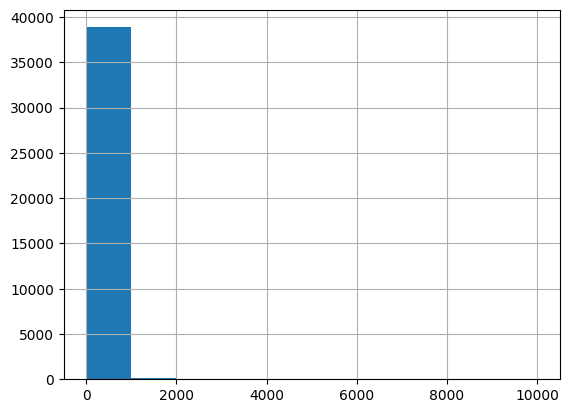

In [ ]:
train['price'].hist()

In [ ]:
train['price'].describe()

,price
count,39116.000000
mean,153.057547
std,248.758522
min,0.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39102 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39100 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31063 non-null  object 
 12  reviews_per_month               

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9777 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9774 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     7780 non-null   object 
 12  reviews_per_month               77

## 데이터 전처리 & 피처엔지니어링

In [ ]:
train.nunique()
#name, host_name, host_id, last_review 삭제 -> 과적합방지
#reviews_per_month 결측치 0으로 채움

,0
id,39116
name,38447
host_id,30821
host_name,9943
neighbourhood_group,5
neighbourhood,221
latitude,17378
longitude,13607
room_type,3
minimum_nights,94


In [ ]:
print(train.shape)
cols = ['name', 'host_name', 'last_review', 'host_id']
train = train.drop(cols, axis=1)
print(train.shape)
test = test.drop(cols, axis=1)


(39116, 16)
(39116, 12)


In [ ]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = train['reviews_per_month'].fillna(0)
train.isnull().sum()

,0
id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0


In [ ]:
train = train.drop('id', axis=1)
test_id = test.pop('id')
test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,0.00,327,338
1,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,1.13,6,284
2,Brooklyn,Williamsburg,40.70665,-73.94061,Entire home/apt,4,50,0.48,1,331
3,Brooklyn,Bedford-Stuyvesant,40.68427,-73.95460,Private room,1,18,0.06,1,16
4,Manhattan,Harlem,40.82028,-73.95381,Private room,1,3,0.08,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   neighbourhood                   39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   room_type                       39116 non-null  object 
 5   minimum_nights                  39116 non-null  int64  
 6   number_of_reviews               39116 non-null  int64  
 7   reviews_per_month               39116 non-null  float64
 8   calculated_host_listings_count  39116 non-null  int64  
 9   availability_365                39116 non-null  int64  
 10  price                           39116 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.3+ MB


In [ ]:
#label
from sklearn.preprocessing import LabelEncoder
cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
for col in cols:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])
train[cols]

,neighbourhood_group,neighbourhood,room_type
0,1,28,0
1,2,206,0
2,1,28,0
3,1,214,0
4,1,13,0
...,...,...,...
39111,1,214,1
39112,2,94,1
39113,1,19,0
39114,1,41,0


## 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train.drop('price', axis=1), train['price'], test_size=0.15, random_state=0)

In [ ]:
X_tr.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
24556,1,190,40.65929,-73.99441,0,2,26,2.63,1,173
13731,1,13,40.69373,-73.95041,1,30,35,3.04,3,348
7126,1,13,40.68137,-73.95650,1,2,99,1.67,3,365
14900,1,13,40.68767,-73.95495,1,2,6,0.91,1,52
33036,1,91,40.72212,-73.93780,0,3,0,0.00,1,0


## 모델 & 평가

In [ ]:
# 평가
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def rmse(y_test, y_pred): #RMSE
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle(y_test, y_pred): #RMSLE
    return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))

def mape(y_test, y_pred): #MAPE
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse :",rmse(y_val,pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.06635458236782532
mae:  76.64879188274108
mse:  77477.56834978177
rmse : 278.3479267926775
rmsle:  0.615659066152369
mape:  58.54155050457695


/tmp/ipython-input-42457448.py:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


In [ ]:
# 릿지
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse :",rmse(y_val,pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.0663041407031636
mae:  76.62503465146084
mse:  77481.75419747908
rmse : 278.35544578376596
rmsle:  0.6129380886906999
mape:  58.51664151695613


/tmp/ipython-input-42457448.py:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


In [ ]:
# 라쏘
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse :",rmse(y_val,pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.05629366036077643
mae:  78.76276519528133
mse:  78312.46322286948
rmse : 279.8436406689805
rmsle:  0.6133977877846314
mape:  62.015641975297754


/tmp/ipython-input-42457448.py:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse :",rmse(y_val,pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.17298105011178044
mae:  68.0026153147012
mse:  68629.28474391426
rmse : 261.9719159450384
rmsle:  0.4963187035726835
mape:  45.711245995660576


In [ ]:
# xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("r2: ",r2_score(y_val, pred))
print("mae: ",mean_absolute_error(y_val, pred))
print("mse: ",mean_squared_error(y_val, pred))
print("rmse :",rmse(y_val,pred))
print("rmsle: ",rmsle(y_val, pred))
print("mape: ",mape(y_val, pred))

r2:  0.17073732614517212
mae:  70.6621322631836
mse:  68815.484375
rmse : 262.3270561246018
rmsle:  0.5439349699356426
mape:  50.04697117627829


/tmp/ipython-input-42457448.py:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


## 예측 및 csv 생성

In [ ]:
test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,191,40.75965,-73.98652,0,29,0,0.00,327,338
1,1,13,40.68062,-73.94418,0,30,1,1.13,6,284
2,1,214,40.70665,-73.94061,0,4,50,0.48,1,331
3,1,13,40.68427,-73.95460,1,1,18,0.06,1,16
4,2,94,40.82028,-73.95381,1,1,3,0.08,1,0


In [ ]:
pred = model.predict(test)

In [ ]:
pred

array([304.6737 , 170.81943, 165.22365, ..., 165.47078,  99.35577,
       198.49542], dtype=float32)

In [ ]:
pd.DataFrame({'id':test_id, 'output':pred}).to_csv("1.csv", index=False)

In [ ]:
pd.read_csv('1.csv')

,id,output
0,34323697,304.673700
1,29927138,170.819430
2,120362,165.223650
3,31838301,44.410800
4,7244824,55.570724
...,...,...
9774,15359119,48.136417
9775,23565653,137.183300
9776,9920191,165.470780
9777,4792342,99.355770
